In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,preprocessing
from nltk.corpus import stopwords 
from nltk import RegexpTokenizer
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train_data = open('train.txt').readlines()
test_data = open('test.txt').readlines()
general_words = set(stopwords.words('english'))

In [16]:
def neat_paragraphs(paragraph_list) :
    neat_sentences = []
    clean = re.compile('<.*?>')
    for i in range(len(paragraph_list)) :
        paragraph_list[i] = re.sub(clean,'',paragraph_list[i])
    reg_tokens = RegexpTokenizer(r'\w+')
    for i in paragraph_list :
        tokens = reg_tokens.tokenize(i.lower())
        neat_sentences.append([word for word in tokens if word not in general_words and word.isalpha()])
    neat_paragraphs=[]
    for i in neat_sentences :
        neat_paragraphs.append(" ".join(i))
    return neat_paragraphs
def vector_encoding(train_data,test_data):
    tokenizer = preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(train_data+test_data)
    train_encoded = tokenizer.texts_to_sequences(train_data)
    test_encoded = tokenizer.texts_to_sequences(test_data)
    padded_train = preprocessing.sequence.pad_sequences(train_encoded,
                                                              padding='post',maxlen=200)
    padded_test = preprocessing.sequence.pad_sequences(test_encoded,
                                                              padding='post',maxlen=200)
    vocab_size = len(tokenizer.word_index)+1
    return (vocab_size,padded_train,padded_test)

train_data = neat_paragraphs(train_data)
test_data = neat_paragraphs(test_data)

In [17]:
train_label = [1]*12500
test_label = [1]*12500
dummy = [0]*12500
train_label = train_label + dummy 
test_label = test_label + dummy
size,train_vector,test_vector = vector_encoding(train_data,test_data)

## Model1

In [19]:
model1 = models.Sequential()
model1.add(layers.Embedding(size,128))
model1.add(layers.SimpleRNN(units=200,activation='tanh'))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         12998272  
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 200)               65800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 13,064,273
Trainable params: 13,064,273
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model1.fit(train_vector,train_label,epochs=5,shuffle=True,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 161s 8ms/sample - loss: 0.6662 - acc: 0.6197 - val_loss: 0.9982 - val_acc: 0.0012
Epoch 2/5
20000/20000 [==============================] - 158s 8ms/sample - loss: 0.6562 - acc: 0.6304 - val_loss: 1.0527 - val_acc: 0.0342
Epoch 3/5
20000/20000 [==============================] - 161s 8ms/sample - loss: 0.6321 - acc: 0.6417 - val_loss: 1.0945 - val_acc: 0.0634
Epoch 4/5
20000/20000 [==============================] - 159s 8ms/sample - loss: 0.6199 - acc: 0.6432 - val_loss: 1.0414 - val_acc: 0.1092
Epoch 5/5
20000/20000 [==============================] - 160s 8ms/sample - loss: 0.6189 - acc: 0.6461 - val_loss: 1.0702 - val_acc: 0.1166


## Model1  output

25000/25000 - 25s - loss: 0.7674 - acc: 0.5054


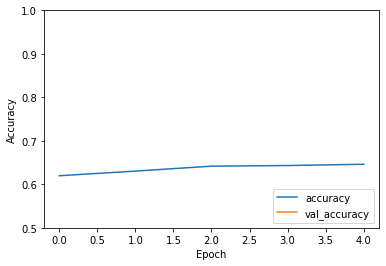

In [23]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model1.evaluate(test_vector,  test_label, verbose=2)

## Model 2

In [24]:
model2 = models.Sequential()
model2.add(layers.Embedding(size,128))
model2.add(layers.CuDNNLSTM(units=200))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         12998272  
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 200)               264000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 13,262,473
Trainable params: 13,262,473
Non-trainable params: 0
_________________________________________________________________


## Run in with google colab for outputs of remaining models

In [39]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model2.fit(train_vector,train_label,epochs=5,shuffle=True,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples


## Model2 output

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_vector,  test_label, verbose=2)

## Model3 

In [25]:
model3 = models.Sequential()
model3.add(layers.Embedding(size,128))
model3.add(layers.GRU(units=200,activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         12998272  
_________________________________________________________________
gru (GRU)                    (None, 200)               197400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 13,195,873
Trainable params: 13,195,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model3.fit(train_vector,train_label,epochs=5,shuffle=True,validation_split=0.2)

## Model3 outputs

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(test_vector,  test_label, verbose=2)

## Model4

In [28]:
model4 = models.Sequential()
model4.add(layers.Embedding(size,128))
model4.add(layers.CuDNNLSTM(units=200,return_sequences=True))
model4.add(layers.CuDNNLSTM(units=200))
model4.add(layers.Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         12998272  
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, None, 200)         264000    
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 200)               321600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 13,584,073
Trainable params: 13,584,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model4.fit(train_vector,train_label,epochs=5,shuffle=True,validation_split=0.2)

## Model4 outputs

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model4.evaluate(test_vector,  test_label, verbose=2)

## Model5

In [40]:
model5 = models.Sequential()
model5.add(layers.Embedding(size,128))
model5.add(layers.CuDNNLSTM(units=200,return_sequences=True))
model5.add(layers.CuDNNLSTM(units=200,return_sequences=True))
model5.add(layers.CuDNNLSTM(units=200))
model5.add(layers.Dense(1,activation='sigmoid'))
model5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         12998272  
_________________________________________________________________
cu_dnnlstm_9 (CuDNNLSTM)     (None, None, 200)         264000    
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, None, 200)         321600    
_________________________________________________________________
cu_dnnlstm_11 (CuDNNLSTM)    (None, 200)               321600    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 13,905,673
Trainable params: 13,905,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model5.fit(train_vector,train_label,epochs=5,shuffle=True,validation_split=0.2)

## Model5 outputs

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model5.evaluate(test_vector,  test_label, verbose=2)